# Module 6 - Recurrent Neural Networks

#### Tasks to be Done:

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('airline-passengers.csv',sep=(','))
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


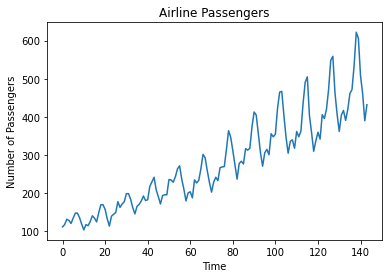

In [4]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.title('Airline Passengers')
plt.show()

In [5]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(144, 1)

In [6]:
scaler = RobustScaler()
dataset = scaler.fit_transform(dataset)

In [7]:
def create_dataset(dataset,window):
    dataX, dataY = [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [8]:
def split_data(X, Y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, Y_train = X[:pos], Y[:pos]
    X_test, Y_test = X[pos:], Y[pos:]
    return X_train, Y_train, X_test, Y_test

In [9]:
window = 1
X, Y = create_dataset(dataset,window)
print('X.shape:{},Y.shape:{}'.format(X.shape, Y.shape))
X_train, Y_train, X_test, Y_test = split_data(X, Y, 0.2)
print('X_train.shape:{}, Y_train.shape:{}, X_test.shape:{}, Y_test.shape{}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X.shape:(142, 1),Y.shape:(142,)
X_train.shape:(114, 1), Y_train.shape:(114,), X_test.shape:(28, 1), Y_test.shape(28,)


In [10]:
Y = Y.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
print('X_train.shape:{}, Y_train.shape:{}, X_test.shape:{}, Y_test.shape{}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train.shape:(114, 1), Y_train.shape:(114, 1), X_test.shape:(28, 1), Y_test.shape(28, 1)


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [12]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,window)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test))

Epoch 1/100
4/4 [==============================] - 7s 515ms/step - loss: 0.2264 - val_loss: 0.9853
Epoch 2/100
4/4 [==============================] - 0s 24ms/step - loss: 0.2232 - val_loss: 0.9907
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2201 - val_loss: 0.9958
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2171 - val_loss: 1.0011
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 0.2142 - val_loss: 1.0063
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.2114 - val_loss: 1.0107
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 0.2085 - val_loss: 1.0147
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2061 - val_loss: 1.0191
Epoch 9/100
4/4 [==============================] - 0s 28ms/step - loss: 0.2037 - val_loss: 1.0229
Epoch 10/100
4/4 [==============================] - 0s 26ms/step - loss: 0.2014 - val_loss: 1.0266
Epoch 11/100
4/4 [

Epoch 84/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0608 - val_loss: 0.5375
Epoch 85/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0594 - val_loss: 0.5282
Epoch 86/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0578 - val_loss: 0.5194
Epoch 87/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0564 - val_loss: 0.5105
Epoch 88/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0550 - val_loss: 0.5018
Epoch 89/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0537 - val_loss: 0.4926
Epoch 90/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0524 - val_loss: 0.4835
Epoch 91/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0510 - val_loss: 0.4751
Epoch 92/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0498 - val_loss: 0.4668
Epoch 93/100
4/4 [==============================] - 0s 29ms/step - loss: 0.0486 - val_loss: 0.4587
Epoch 94/1

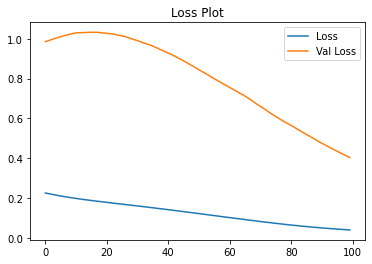

In [14]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(114, 1, 1)
(114, 1)
(28, 1, 1)
(28, 1)


In [16]:
trainPredict = model.predict(X_train, verbose=0)
testPredict = model.predict(X_test, verbose=0)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

In [17]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
trainSctrainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE: %.2f' % (trainSctrainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE: %.2f' % (trainSctrainScore))

Train Score RMSE: 36.36
Test Score RMSE: 36.36


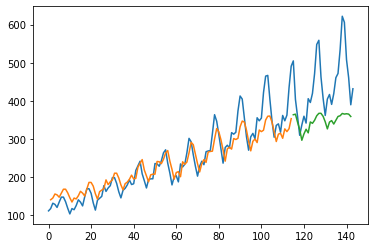

In [18]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[window:len(trainPredict)+window,:] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window):len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [19]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,window)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, Y_train, epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
4/4 [==============================] - 7s 410ms/step - loss: 0.2123 - val_loss: 0.8940
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.2088 - val_loss: 0.9066
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.2057 - val_loss: 0.9149
Epoch 4/50
4/4 [==============================] - 0s 28ms/step - loss: 0.2034 - val_loss: 0.9255
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.2010 - val_loss: 0.9336
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 0.1989 - val_loss: 0.9396
Epoch 7/50
4/4 [==============================] - 0s 22ms/step - loss: 0.1972 - val_loss: 0.9452
Epoch 8/50
4/4 [==============================] - 0s 23ms/step - loss: 0.1956 - val_loss: 0.9496
Epoch 9/50
4/4 [==============================] - 0s 23ms/step - loss: 0.1940 - val_loss: 0.9547
Epoch 10/50
4/4 [==============================] - 0s 22ms/step - loss: 0.1926 - val_loss: 0.9544
Epoch 11/50
4/4 [===========

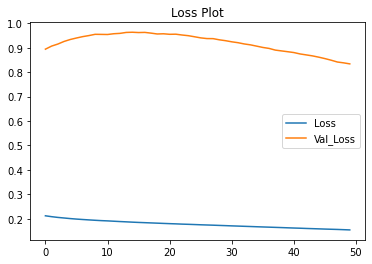

In [21]:
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val_Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(114, 1, 1)
(114, 1)
(28, 1, 1)
(28, 1)


In [23]:
trainPredict = model.predict(X_train, verbose=0)
testPredict = model.predict(X_test, verbose=0)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(Y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(Y_test)

In [24]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
trainSctrainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE: %.2f' % (trainSctrainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE: %.2f' % (trainSctrainScore))

Train Score RMSE: 70.83
Test Score RMSE: 70.83


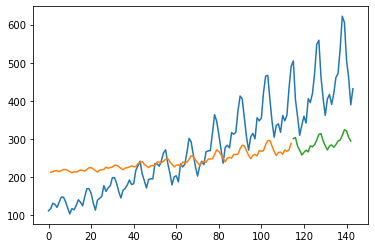

In [25]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[window:len(trainPredict)+window,:] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(window):len(dataset)-1,:] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()